## Using NY Times APIs

What are APIs?

Structured ways people can give you their data.

Why?

Usually because they want to help web/mobile developers attract more users to their service.

Twitter doesn't have an API to help you out.

They want developers to build apps to drive more eyeballs to their service.

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/times_inequality.png)

No love with the scrape!!!

![](https://raw.github.com/nealcaren/workshop_2014/master/notebooks/images/no_luck.png)

In [1]:
import requests

Do me a favor and sign up to be a [developer](http://developer.nytimes.com) with the New York Times and get your own API key.

In [2]:
my_times_api_key = 'YOUR-API-GOES-HERE'

APIs can be accessed like a normal URL, but they are often very long, complicated, and involve variables you want to change. For example, you can get the information about the first 10 articles published in the New York Times that used the word Ukraine with:

[http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20130101&end_date=20131231&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=Ukraine&page=0](http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=newest&begin_date=20130101&end_date=20131231&api-key=d20bc9ac37156ecc4cb3d78eb956201d%3A0%3A54059647&q=Ukraine&page=0)

Requests allows you to do this in a more civilized way.

In [3]:
payload = {'q'         : 'Ukraine', 
           'begin_date': '20150101' ,
           'end_date'  : '20151231',
           'api-key'   :  my_times_api_key,
           'sort'      : 'oldest' ,
           'offset'    :  20}

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [4]:
r = requests.get(base_url, params = payload)

r.url

u'http://api.nytimes.com/svc/search/v2/articlesearch.json?sort=oldest&begin_date=20150101&end_date=20151231&api-key=d387ec2e77bc9e8504fcdfc363be6cac%3A11%3A72519191&q=Ukraine&offset=20'

In [5]:
r.text

u'{"response":{"meta":{"hits":4164,"time":307,"offset":0},"docs":[{"web_url":"http:\\/\\/www.nytimes.com\\/2015\\/01\\/01\\/business\\/international\\/airasia-tony-fernandes-responds-to-crisis-with-quick-compassion.html","snippet":"The actions of Tony Fernandes, the chief executive of the Malaysian company, have been compared favorably to the response of Malaysia Airlines earlier in 2014.","lead_paragraph":"The actions of Tony Fernandes, the chief executive of the Malaysian company, have been compared favorably to the response of Malaysia Airlines earlier in 2014.","abstract":"Handling of latest fatal AirAsia crash by chief executive Tony Fernandes has received far better public response than that by Malaysia Airlines for management of its disaster earlier in 2014; Fernandes addressed situation with the same compassionate, hands-on approach that has won him praise for his turnaround of AirAsia as a whole, which was deeply in debt and under state control 13 years earlier.","print_page":

In [6]:
r.json()

{u'copyright': u'Copyright (c) 2013 The New York Times Company.  All Rights Reserved.',
 u'response': {u'docs': [{u'_id': u'54a45a2a38f0d83a07dc3d4d',
    u'abstract': u'Handling of latest fatal AirAsia crash by chief executive Tony Fernandes has received far better public response than that by Malaysia Airlines for management of its disaster earlier in 2014; Fernandes addressed situation with the same compassionate, hands-on approach that has won him praise for his turnaround of AirAsia as a whole, which was deeply in debt and under state control 13 years earlier.',
    u'blog': [],
    u'byline': {u'contributor': u'Austin Ramzy contributed reporting from Hong Kong and Michael Forsythe from Putrajaya, Malaysia.',
     u'original': u'By ALEXANDRA STEVENSON and NEIL GOUGH',
     u'person': [{u'firstname': u'Alexandra',
       u'lastname': u'STEVENSON',
       u'organization': u'',
       u'rank': 1,
       u'role': u'reported'},
      {u'firstname': u'Neil',
       u'lastname': u'GOUGH'

In [7]:
json = r.json()


In [8]:
json.keys()

[u'status', u'response', u'copyright']

In [9]:

json.keys()

[u'status', u'response', u'copyright']

In [10]:
json['status']

u'OK'

Output from `json['response']` ommitted because it was really long.

In [11]:
json['response']['docs']

[{u'_id': u'54a45a2a38f0d83a07dc3d4d',
  u'abstract': u'Handling of latest fatal AirAsia crash by chief executive Tony Fernandes has received far better public response than that by Malaysia Airlines for management of its disaster earlier in 2014; Fernandes addressed situation with the same compassionate, hands-on approach that has won him praise for his turnaround of AirAsia as a whole, which was deeply in debt and under state control 13 years earlier.',
  u'blog': [],
  u'byline': {u'contributor': u'Austin Ramzy contributed reporting from Hong Kong and Michael Forsythe from Putrajaya, Malaysia.',
   u'original': u'By ALEXANDRA STEVENSON and NEIL GOUGH',
   u'person': [{u'firstname': u'Alexandra',
     u'lastname': u'STEVENSON',
     u'organization': u'',
     u'rank': 1,
     u'role': u'reported'},
    {u'firstname': u'Neil',
     u'lastname': u'GOUGH',
     u'organization': u'',
     u'rank': 2,
     u'role': u'reported'}]},
  u'document_type': u'article',
  u'headline': {u'main': u

In [12]:
json['response']['meta']['hits']

4164

In [14]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

for year in years:
    year_string = str(year)
    payload = { 'q'         : 'Ukraine', 
                'begin_date':  year_string + '0101',
                'end_date'  :  year_string + '1231',
                'api-key'   :  my_times_api_key,
                'sort'      : 'newest' ,
                'page'      :  0}
    
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    print year, count
    sleep(.1)

2003 225
2004 368
2005 410
2006 595
2007 374
2008 556
2009 602
2010 464
2011 546
2012 520
2013 591
2014 13578
2015 4164


In [19]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

payload = { 'q'         : 'Ukraine', 
            'api-key'   :  my_times_api_key,
            'sort'      : 'newest' ,
            'page'      :  0}
    
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
counts = []
for year in years:
 
    
    year_string = str(year)
    payload['begin_date'] = year_string + '0101'
    payload['end_date']   = year_string + '1231'
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    counts.append(count)
    sleep(.1)   

This can be plotted in Python.

Populating the interactive namespace from numpy and matplotlib


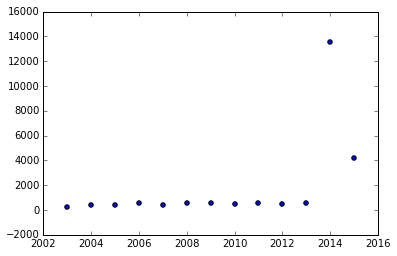

In [20]:
%pylab inline
import matplotlib.pyplot as plt

plt.scatter(years,counts)
plt.ticklabel_format(useOffset=False)